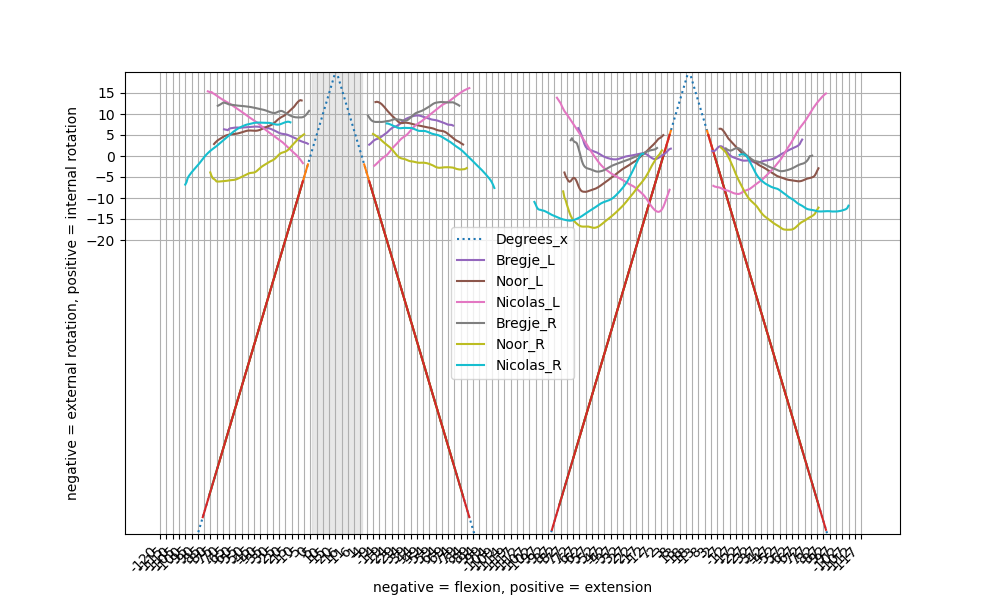

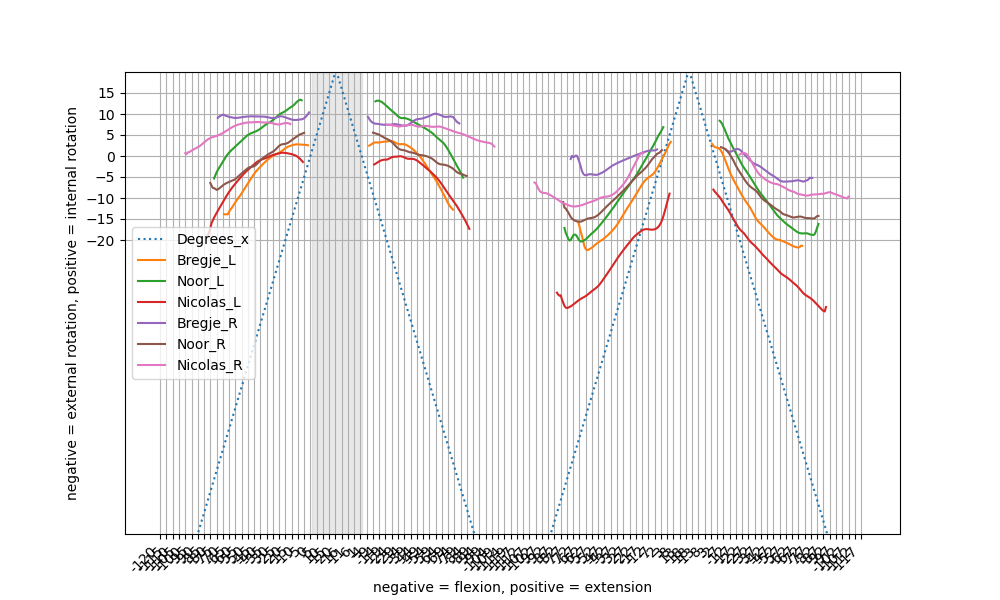

In [3]:
%matplotlib widget

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.spatial.transform import Rotation as R
from scipy.signal import find_peaks, peak_prominences


df1_L = pd.read_csv('Output/Bregje-L_analysis.csv')
df1_R = pd.read_csv('Output/Bregje-R_analysis_negated.csv')
df2_L = pd.read_csv('Output/Noor-L_analysis.csv')
df2_R = pd.read_csv('Output/Noor-R_analysis_negated.csv')
df3_L = pd.read_csv('Output/Nicolas-L_analysis.csv')
df3_R = pd.read_csv('Output/Nicolas-R_analysis_negated.csv')

# smooth data 'Diff_z_avg'
df1_L['Diff_z_avg'] = df1_L['Diff_z_avg'].rolling(5).mean()
df2_L['Diff_z_avg'] = df2_L['Diff_z_avg'].rolling(5).mean()
df3_L['Diff_z_avg'] = df3_L['Diff_z_avg'].rolling(5).mean()
df1_R['Diff_z_avg'] = df1_R['Diff_z_avg'].rolling(5).mean()
df2_R['Diff_z_avg'] = df2_R['Diff_z_avg'].rolling(5).mean()
df3_R['Diff_z_avg'] = df3_R['Diff_z_avg'].rolling(5).mean()



# smooth data 'minus_Sensor2_z_plus_Sensor1_z_avg'
df1_L['minus_Sensor2_z_plus_Sensor1_z_avg'] = df1_L['minus_Sensor2_z_plus_Sensor1_z_avg'].rolling(5).mean()
df2_L['minus_Sensor2_z_plus_Sensor1_z_avg'] = df2_L['minus_Sensor2_z_plus_Sensor1_z_avg'].rolling(5).mean()
df3_L['minus_Sensor2_z_plus_Sensor1_z_avg'] = df3_L['minus_Sensor2_z_plus_Sensor1_z_avg'].rolling(5).mean()
df1_R['minus_Sensor2_z_plus_Sensor1_z_avg'] = df1_R['minus_Sensor2_z_plus_Sensor1_z_avg'].rolling(5).mean()
df2_R['minus_Sensor2_z_plus_Sensor1_z_avg'] = df2_R['minus_Sensor2_z_plus_Sensor1_z_avg'].rolling(5).mean()
df3_R['minus_Sensor2_z_plus_Sensor1_z_avg'] = df3_R['minus_Sensor2_z_plus_Sensor1_z_avg'].rolling(5).mean()


fig, ax = plt.subplots(figsize=(10, 6))

# y axis range from -90 to 20
ax.set_ylim(-90, 20)

ax.plot(df1_L.index, df1_L['Degrees_x'], label='Degrees_x', linestyle=':')



ax.plot(df1_L.index, df1_L['Diff_x_avg'])
ax.plot(df2_L.index, df2_L['Diff_x_avg'])
ax.plot(df3_L.index, df3_L['Diff_x_avg'])


ax.plot(df1_L.index, df1_L['Diff_z_avg'], label='Bregje_L')
ax.plot(df2_L.index, df2_L['Diff_z_avg'], label='Noor_L')
ax.plot(df3_L.index, df3_L['Diff_z_avg'], label='Nicolas_L')
ax.plot(df1_R.index, df1_R['Diff_z_avg'], label='Bregje_R')
ax.plot(df2_R.index, df2_R['Diff_z_avg'], label='Noor_R')
ax.plot(df3_R.index, df3_R['Diff_z_avg'], label='Nicolas_R')

# Select every 5th value from 'Degrees_x' for custom x-axis ticks
x_ticks = df1_L.index[::5]
x_ticklabels = df1_L['Degrees_x'][::5]

# Set custom x-axis ticks and labels
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels, rotation=45, ha='right')

ax.set_yticks(np.arange(-20, 20, 5))

ax.axvspan(121, 161, color='lightgray', alpha=0.5)

ax.grid(True)
ax.set_ylabel('negative = external rotation, positive = internal rotation')
ax.set_xlabel('negative = flexion, positive = extension')
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))

# y axis range from -90 to 20
ax.set_ylim(-90, 20)

ax.plot(df1_L.index, df1_L['Degrees_x'], label='Degrees_x', linestyle=':')

ax.plot(df1_L.index, df1_L['minus_Sensor2_z_plus_Sensor1_z_avg'], label='Bregje_L')
ax.plot(df2_L.index, df2_L['minus_Sensor2_z_plus_Sensor1_z_avg'], label='Noor_L')
ax.plot(df3_L.index, df3_L['minus_Sensor2_z_plus_Sensor1_z_avg'], label='Nicolas_L')
ax.plot(df1_R.index, df1_R['minus_Sensor2_z_plus_Sensor1_z_avg'], label='Bregje_R')
ax.plot(df2_R.index, df2_R['minus_Sensor2_z_plus_Sensor1_z_avg'], label='Noor_R')
ax.plot(df3_R.index, df3_R['minus_Sensor2_z_plus_Sensor1_z_avg'], label='Nicolas_R')

# Select every 5th value from 'Degrees_x' for custom x-axis ticks
x_ticks = df1_L.index[::5]
x_ticklabels = df1_L['Degrees_x'][::5]

# Set custom x-axis ticks and labels
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels, rotation=45, ha='right')

ax.set_yticks(np.arange(-20, 20, 5))

ax.axvspan(121, 161, color='lightgray', alpha=0.5)

ax.grid(True)
ax.set_ylabel('negative = external rotation, positive = internal rotation')
ax.set_xlabel('negative = flexion, positive = extension')
ax.legend()
plt.show()




In [17]:
z_only_zero_1_L = pd.read_csv('Output/Bregje-L_z_only_zero.csv')
z_only_zero_2_L = pd.read_csv('Output/Noor-L_z_only_zero.csv')
z_only_zero_3_L = pd.read_csv('Output/Nicolas-L_z_only_zero.csv')


z_only_zero_1_R = pd.read_csv('Output/Bregje-R_z_only_zero.csv')
z_only_zero_2_R = pd.read_csv('Output/Noor-R_z_only_zero.csv')
z_only_zero_3_R = pd.read_csv('Output/Nicolas-R_z_only_zero.csv')

# negate z_only_zero_1_R
z_only_zero_1_R = -z_only_zero_1_R
z_only_zero_2_R = -z_only_zero_2_R
z_only_zero_3_R = -z_only_zero_3_R

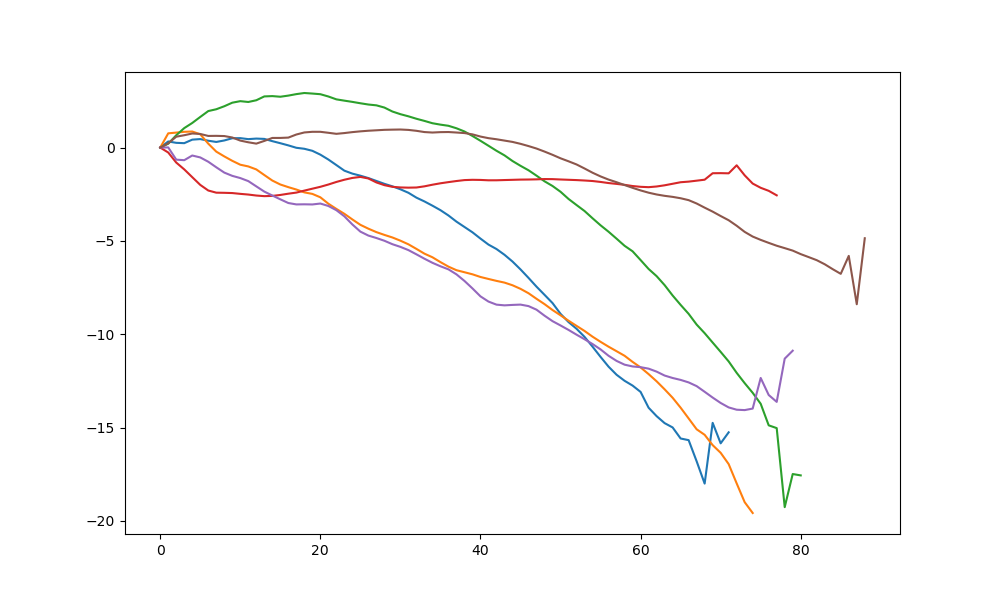

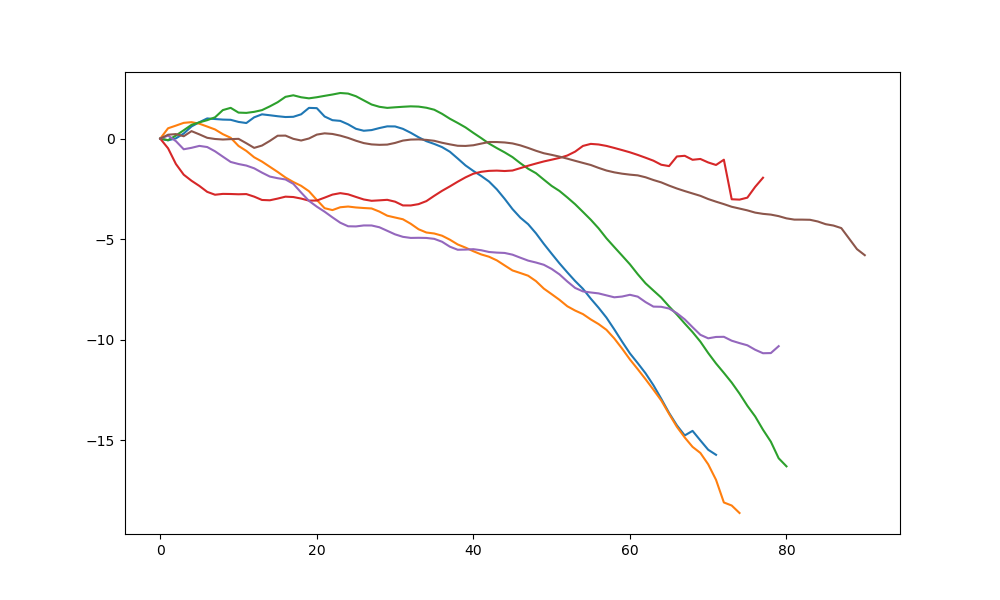

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(z_only_zero_1_L['OKC_extension_only_minus_Sensor2_z_plus_Sensor1_z_avg'], label='Bregje_L')
plt.plot(z_only_zero_2_L['OKC_extension_only_minus_Sensor2_z_plus_Sensor1_z_avg'], label='Noor_L')
plt.plot(z_only_zero_3_L['OKC_extension_only_minus_Sensor2_z_plus_Sensor1_z_avg'], label='Nicolas_L')
plt.plot(z_only_zero_1_R['OKC_extension_only_minus_Sensor2_z_plus_Sensor1_z_avg'], label='Bregje_R')
plt.plot(z_only_zero_2_R['OKC_extension_only_minus_Sensor2_z_plus_Sensor1_z_avg'], label='Noor_R')
plt.plot(z_only_zero_3_R['OKC_extension_only_minus_Sensor2_z_plus_Sensor1_z_avg'], label='Nicolas_R')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(z_only_zero_1_L['OKC_flexion_only_minus_Sensor2_z_plus_Sensor1_z_avg'], label='Bregje_L')
plt.plot(z_only_zero_2_L['OKC_flexion_only_minus_Sensor2_z_plus_Sensor1_z_avg'], label='Noor_L')
plt.plot(z_only_zero_3_L['OKC_flexion_only_minus_Sensor2_z_plus_Sensor1_z_avg'], label='Nicolas_L')
plt.plot(z_only_zero_1_R['OKC_flexion_only_minus_Sensor2_z_plus_Sensor1_z_avg'], label='Bregje_R')
plt.plot(z_only_zero_2_R['OKC_flexion_only_minus_Sensor2_z_plus_Sensor1_z_avg'], label='Noor_R')
plt.plot(z_only_zero_3_R['OKC_flexion_only_minus_Sensor2_z_plus_Sensor1_z_avg'], label='Nicolas_R')
plt.show()